# Initializing project

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

import time

#for google access
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
project_path = "../content/drive/My Drive/CSCI_534 Project/Project/Nokia Data"
# project_path = './'

nokia_stock = pd.read_csv(project_path+'/Nokia Stock Data.csv') #181 of sample
nokia_liwc = pd.read_csv(project_path+'/nokia_english_liwc.csv') #120381 of samples

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
nokia_liwc.shape

(120381, 97)

In [4]:
nokia_liwc = nokia_liwc.dropna(subset=['Datetime','Text','affect','posemo','negemo','anx','anger','sad'])
nokia_liwc.shape #120380

(120380, 97)

# Preparing data

In this part, we will combine and prepare the data is neccessary for the model to learn such as date, stock price and liwc scores.

In [5]:
#In this part we are preparing data for processing (taking datetime and scores from liwc data)
nokia_liwc_date = nokia_liwc['Datetime'].to_numpy()
nokia_liwc_affect = nokia_liwc['affect'].to_numpy()
nokia_liwc_pos = nokia_liwc['posemo'].to_numpy()
nokia_liwc_neg = nokia_liwc['negemo'].to_numpy()
nokia_liwc_anx = nokia_liwc['anx'].to_numpy()
nokia_liwc_anger = nokia_liwc['anger'].to_numpy()
nokia_liwc_sad = nokia_liwc['sad'].to_numpy()

In [6]:
#Cleaning nokia data
for i in range(len(nokia_liwc_date)):
    nokia_liwc_date[i] = nokia_liwc_date[i].split()[0] #cleaning the data only the date
    #change date fromat
    #mm/dd/yyy
    nokia_liwc_date[i]=time.strptime(nokia_liwc_date[i],'%Y-%m-%d') 
    nokia_liwc_date[i]=time.strftime('%m/%d/%Y',nokia_liwc_date[i])

In [7]:
#put nokia liwc data in df
nokia_liwc_df = pd.DataFrame({
    'Date':nokia_liwc_date,
    'affect':nokia_liwc_affect,
    'pos':nokia_liwc_pos,
    'neg':nokia_liwc_neg,
    'anx':nokia_liwc_anx,
    'anger':nokia_liwc_anger,
    'sad':nokia_liwc_sad
})
#combine data on the same date(caculate the descriptive statistics of "affect","neg","pos","anx","anger","sad")
#mean
nokia_liwc_df_mean = nokia_liwc_df.groupby(['Date']).agg({'affect':np.mean,'pos':np.mean,'neg':np.mean,'anx':np.mean,'anger':np.mean,'sad':np.mean}).reset_index()
#median
nokia_liwc_df_median = nokia_liwc_df.groupby(['Date']).agg({'affect':np.median,'pos':np.median,'neg':np.median,'anx':np.median,'anger':np.median,'sad':np.median}).reset_index()
#std
nokia_liwc_df_std = nokia_liwc_df.groupby(['Date']).agg({'affect':np.std,'pos':np.std,'neg':np.std,'anx':np.std,'anger':np.std,'sad':np.std}).reset_index()
#max
nokia_liwc_df_max = nokia_liwc_df.groupby(['Date']).agg({'affect':np.max,'pos':np.max,'neg':np.max,'anx':np.max,'anger':np.max,'sad':np.max}).reset_index()
#min
nokia_liwc_df_min = nokia_liwc_df.groupby(['Date']).agg({'affect':np.min,'pos':np.min,'neg':np.min,'anx':np.min,'anger':np.min,'sad':np.min}).reset_index()

In [8]:
#clean the stock date(taking datetime and close from stock data)
nokia_stock_date = nokia_stock['Date'].to_numpy()
nokia_stock_close = nokia_stock['Close'].to_numpy()

In [9]:
#get stock date and change format
for i in range(len(nokia_stock_date)):
  nokia_stock_date[i] = nokia_stock_date[i].split()[0]
  nokia_stock_date[i]=time.strptime(nokia_stock_date[i],'%m/%d/%Y')
  nokia_stock_date[i]=time.strftime('%m/%d/%Y',nokia_stock_date[i])

In [10]:
#put nokia stock data in df
nokia_stock_df = pd.DataFrame({
    'Date':nokia_stock_date,
    'close':nokia_stock_close
})
#nokia_stock_df

In [11]:
#normalizing the stock value
nokia_stock_df['close'] = (nokia_stock_df['close'] - nokia_stock_df['close'].min()) / (nokia_stock_df['close'].max() - nokia_stock_df['close'].min())
#nokia_stock_df

In [12]:
#merge liwc mean data and stock data
nokia_merge_df_mean = pd.merge(nokia_liwc_df_mean,nokia_stock_df,on='Date',how="left")
nokia_merge_df_mean = nokia_merge_df_mean.dropna().reset_index(drop=True)

#median
nokia_merge_df_median = pd.merge(nokia_liwc_df_median,nokia_stock_df,on='Date',how="left")
nokia_merge_df_median = nokia_merge_df_median.dropna().reset_index(drop=True)

#std
nokia_merge_df_std = pd.merge(nokia_liwc_df_std,nokia_stock_df,on='Date',how="left")
nokia_merge_df_std = nokia_merge_df_std.dropna().reset_index(drop=True)

#max
nokia_merge_df_max = pd.merge(nokia_liwc_df_max,nokia_stock_df,on='Date',how="left")
nokia_merge_df_max = nokia_merge_df_max.dropna().reset_index(drop=True)

#min
nokia_merge_df_min = pd.merge(nokia_liwc_df_min,nokia_stock_df,on='Date',how="left")
nokia_merge_df_min = nokia_merge_df_min.dropna().reset_index(drop=True)

nokia_merge_df_mean.shape #50 days worth of data

(50, 8)

# Training the linear model

Training the linear model for Nokia

In [13]:
#Creating a model based on the nokia data
#nokia_merge_df[['affect','pos','neg','anx','anger','sad']] is the data or x or feature
#nokia_merge_df[['close']] is the label
#mean
reg_nokia_mean = LinearRegression().fit(nokia_merge_df_mean[['affect','pos','neg','anx','anger','sad']][:-10], nokia_merge_df_mean[['close']][:-10])
#median
reg_nokia_median = LinearRegression().fit(nokia_merge_df_median[['affect','pos','neg','anx','anger','sad']][:-10], nokia_merge_df_median[['close']][:-10])
#std
reg_nokia_std = LinearRegression().fit(nokia_merge_df_std[['affect','pos','neg','anx','anger','sad']][:-10], nokia_merge_df_std[['close']][:-10])
#max
reg_nokia_max = LinearRegression().fit(nokia_merge_df_max[['affect','pos','neg','anx','anger','sad']][:-10], nokia_merge_df_max[['close']][:-10])
#min
reg_nokia_min = LinearRegression().fit(nokia_merge_df_min[['affect','pos','neg','anx','anger','sad']][:-10], nokia_merge_df_min[['close']][:-10])

# Plot the data and model of for each company

Predict Nokia model with all feature

In [14]:
#each model is predicting the label using the data that we have
#pred_nokia is a numpy array consisting the values of prediction of the nokia data that we use for the training
#mean 
pred_nokia_mean = reg_nokia_mean.predict(nokia_merge_df_mean[['affect','pos','neg','anx','anger','sad']][-10:])
#median
pred_nokia_median = reg_nokia_median.predict(nokia_merge_df_median[['affect','pos','neg','anx','anger','sad']][-10:])
#std
pred_nokia_std = reg_nokia_std.predict(nokia_merge_df_std[['affect','pos','neg','anx','anger','sad']][-10:])
#max
pred_nokia_max = reg_nokia_max.predict(nokia_merge_df_max[['affect','pos','neg','anx','anger','sad']][-10:])
#min
pred_nokia_min = reg_nokia_min.predict(nokia_merge_df_min[['affect','pos','neg','anx','anger','sad']][-10:])

#To plot the training model
#mean 
train_nokia_mean = reg_nokia_mean.predict(nokia_merge_df_mean[['affect','pos','neg','anx','anger','sad']][:-10])
#median
train_nokia_median = reg_nokia_median.predict(nokia_merge_df_median[['affect','pos','neg','anx','anger','sad']][:-10])
#std
train_nokia_std = reg_nokia_std.predict(nokia_merge_df_std[['affect','pos','neg','anx','anger','sad']][:-10])
#max
train_nokia_max = reg_nokia_max.predict(nokia_merge_df_max[['affect','pos','neg','anx','anger','sad']][:-10])
#min
train_nokia_min = reg_nokia_min.predict(nokia_merge_df_min[['affect','pos','neg','anx','anger','sad']][:-10])

#In this part, I am combining the data of each company with the prediction
#mean
nokia_merge_pred_mean = pd.concat([nokia_merge_df_mean[:-10], pd.DataFrame(train_nokia_mean,columns=['pred'])], axis=1)
#median
nokia_merge_pred_median = pd.concat([nokia_merge_df_median[:-10], pd.DataFrame(train_nokia_median,columns=['pred'])], axis=1)
#std
nokia_merge_pred_std = pd.concat([nokia_merge_df_std[:-10], pd.DataFrame(train_nokia_std,columns=['pred'])], axis=1)
#max
nokia_merge_pred_max = pd.concat([nokia_merge_df_max[:-10], pd.DataFrame(train_nokia_max,columns=['pred'])], axis=1)
#min
nokia_merge_pred_min = pd.concat([nokia_merge_df_min[:-10], pd.DataFrame(train_nokia_min,columns=['pred'])], axis=1)

Display the perfomance of the model

In [15]:
from sklearn.metrics import mean_squared_error

#This is the score of the prediction/ performance of the model
#mean
nokia_score_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_mean)
#median
nokia_score_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_median)
#std
nokia_score_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_std)
#max
nokia_score_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_max)
#min
nokia_score_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_min)
[nokia_score_mean,nokia_score_median,nokia_score_std,nokia_score_max,nokia_score_min]

[0.014803891965768451,
 0.0132656056799841,
 0.014582782419619128,
 0.00512759862627269,
 0.01071340185343545]

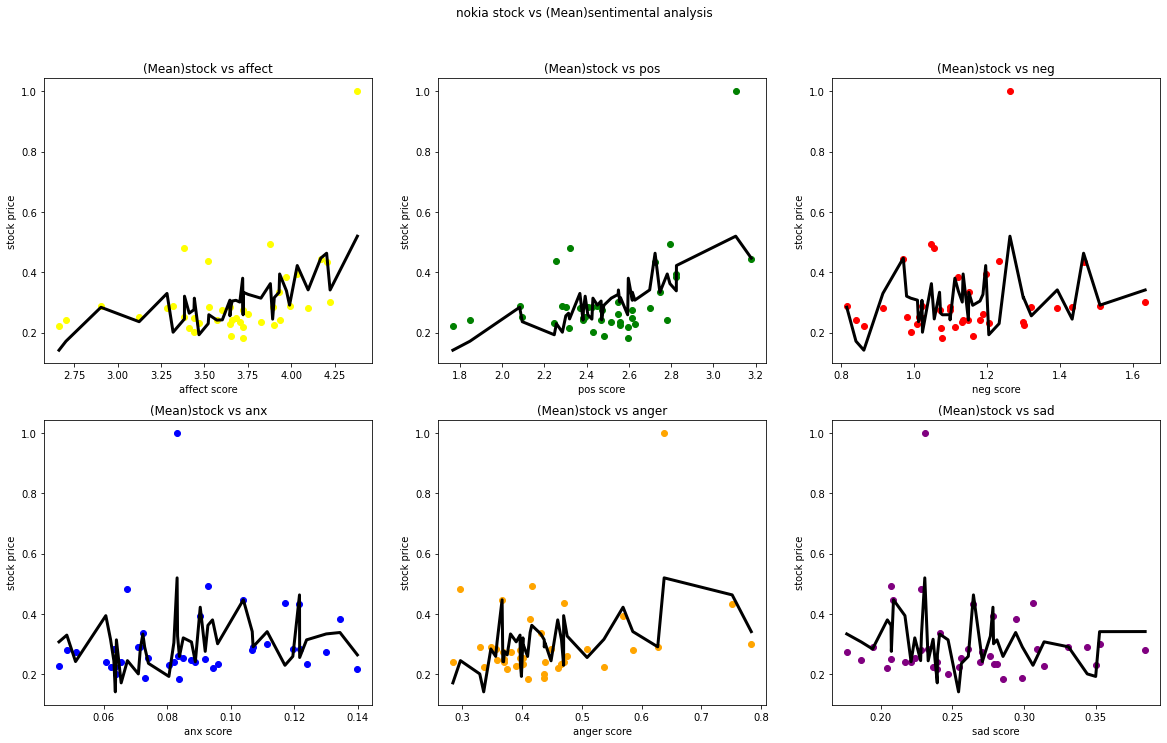

In [16]:
#plot nokia
#In this part, it is plotting the data with the stock + the model itself
#Mean sentimental analysis
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('nokia stock vs (Mean)sentimental analysis')
fig.set_size_inches(20,10)

nokia_sort_affect_mean = nokia_merge_pred_mean.sort_values(by=['affect'])
axs[0,0].scatter(nokia_sort_affect_mean[['affect']],nokia_sort_affect_mean[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(nokia_sort_affect_mean[['affect']], nokia_sort_affect_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('(Mean)stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

nokia_sort_pos_mean = nokia_merge_pred_mean.sort_values(by=['pos'])
axs[0,1].scatter(nokia_sort_pos_mean[['pos']],nokia_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(nokia_sort_pos_mean[['pos']], nokia_sort_pos_mean[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(Mean)stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

nokia_sort_neg_mean = nokia_merge_pred_mean.sort_values(by=['neg'])
axs[0,2].scatter(nokia_sort_neg_mean[['neg']],nokia_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(nokia_sort_neg_mean[['neg']], nokia_sort_neg_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('(Mean)stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

nokia_sort_anx_mean = nokia_merge_pred_mean.sort_values(by=['anx'])
axs[1,0].scatter(nokia_sort_anx_mean[['anx']],nokia_sort_anx_mean[['close']],color='blue',label='anx') #Plotting the data
axs[1,0].plot(nokia_sort_anx_mean[['anx']], nokia_sort_anx_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,0].set_title('(Mean)stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

nokia_sort_anger_mean = nokia_merge_pred_mean.sort_values(by=['anger'])
axs[1,1].scatter(nokia_sort_anger_mean[['anger']],nokia_sort_anger_mean[['close']],color='orange',label='anger') #Plotting the data
axs[1,1].plot(nokia_sort_anger_mean[['anger']], nokia_sort_anger_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,1].set_title('(Mean)stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

nokia_sort_sad_mean = nokia_merge_pred_mean.sort_values(by=['sad'])
axs[1,2].scatter(nokia_sort_sad_mean[['sad']],nokia_sort_sad_mean[['close']],color='purple',label='sad') #Plotting the data
axs[1,2].plot(nokia_sort_sad_mean[['sad']], nokia_sort_sad_mean[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,2].set_title('(Mean)stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

In [17]:
#Median sentimental analysis

In [18]:
#Std sentimental analysis

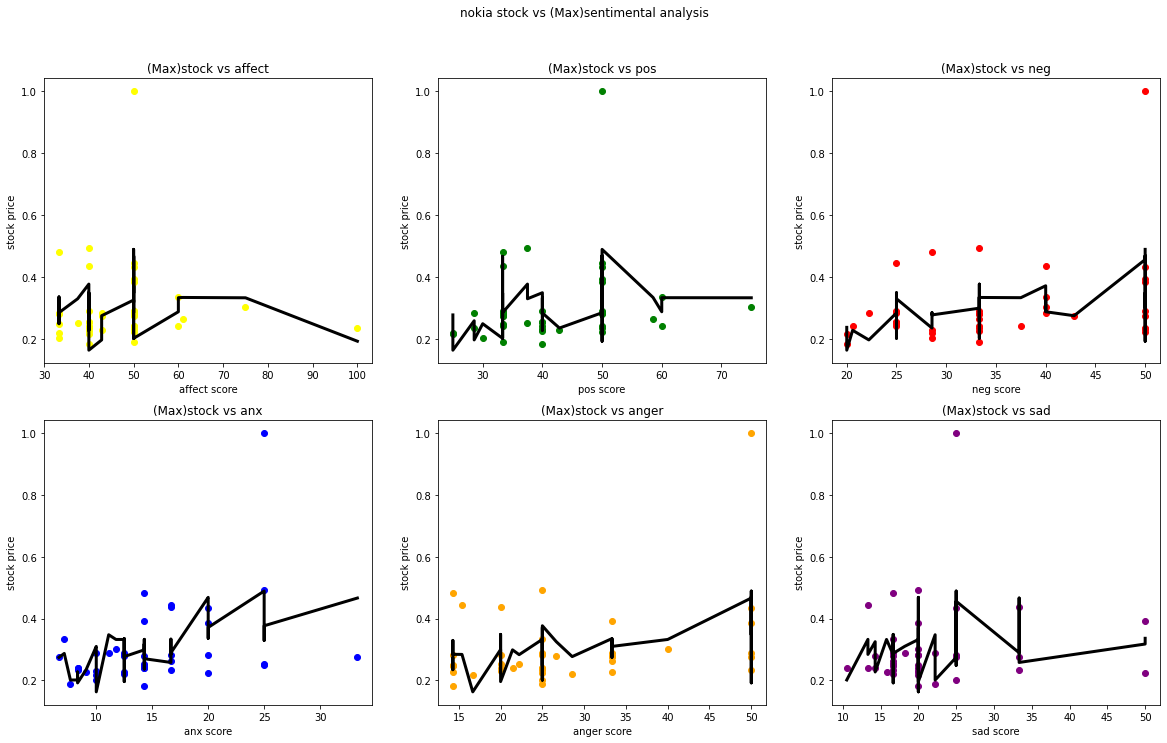

In [19]:
#Max sentimental analysis
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('nokia stock vs (Max)sentimental analysis')
fig.set_size_inches(20,10)

nokia_sort_affect_max = nokia_merge_pred_max.sort_values(by=['affect'])
axs[0,0].scatter(nokia_sort_affect_max[['affect']],nokia_sort_affect_max[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(nokia_sort_affect_max[['affect']], nokia_sort_affect_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('(Max)stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

nokia_sort_pos_max = nokia_merge_pred_max.sort_values(by=['pos'])
axs[0,1].scatter(nokia_sort_pos_max[['pos']],nokia_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(nokia_sort_pos_max[['pos']], nokia_sort_pos_max[['pred']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('(Max)stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

nokia_sort_neg_max = nokia_merge_pred_max.sort_values(by=['neg'])
axs[0,2].scatter(nokia_sort_neg_max[['neg']],nokia_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(nokia_sort_neg_max[['neg']], nokia_sort_neg_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('(Max)stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

nokia_sort_anx_max = nokia_merge_pred_max.sort_values(by=['anx'])
axs[1,0].scatter(nokia_sort_anx_max[['anx']],nokia_sort_anx_max[['close']],color='blue',label='anx') #Plotting the data
axs[1,0].plot(nokia_sort_anx_max[['anx']], nokia_sort_anx_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,0].set_title('(Max)stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

nokia_sort_anger_max = nokia_merge_pred_max.sort_values(by=['anger'])
axs[1,1].scatter(nokia_sort_anger_max[['anger']],nokia_sort_anger_max[['close']],color='orange',label='anger') #Plotting the data
axs[1,1].plot(nokia_sort_anger_max[['anger']], nokia_sort_anger_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,1].set_title('(Max)stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

nokia_sort_sad_max = nokia_merge_pred_max.sort_values(by=['sad'])
axs[1,2].scatter(nokia_sort_sad_max[['sad']],nokia_sort_sad_max[['close']],color='purple',label='sad') #Plotting the data
axs[1,2].plot(nokia_sort_sad_max[['sad']], nokia_sort_sad_max[['pred']], color='black', linewidth=3) #plotting the model by using the prediction
axs[1,2].set_title('(Max)stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

In [20]:
#Min sentimental analysis

# Plot data against time

Plotting Nokia stock with mean sentimental analysis

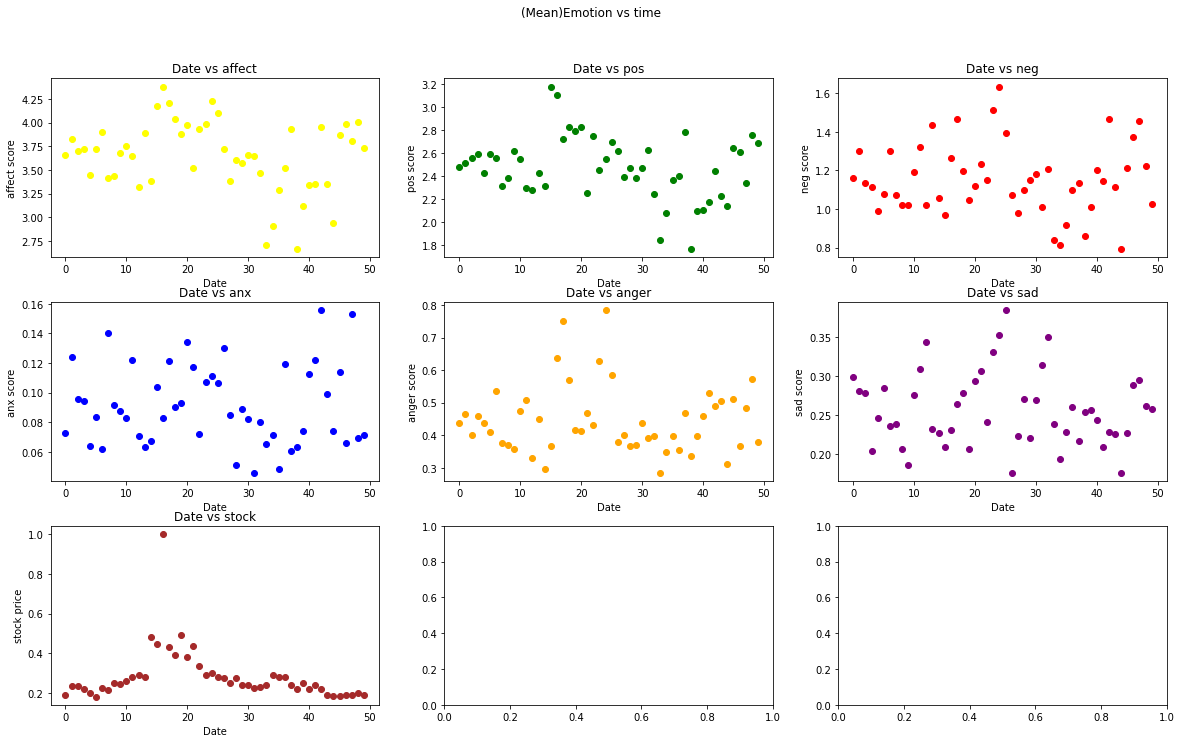

In [21]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Mean)Emotion vs time')
fig.set_size_inches(20,10)

nokia_sort_affect_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(nokia_sort_affect_mean.shape[0])],nokia_sort_affect_mean[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

nokia_sort_pos_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(nokia_sort_pos_mean.shape[0])],nokia_sort_pos_mean[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

nokia_sort_neg_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(nokia_sort_neg_mean.shape[0])],nokia_sort_neg_mean[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

nokia_sort_anx_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(nokia_sort_anx_mean.shape[0])],nokia_sort_anx_mean[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

nokia_sort_anger_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(nokia_sort_anger_mean.shape[0])],nokia_sort_anger_mean[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

nokia_sort_sad_mean = nokia_merge_df_mean.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(nokia_sort_sad_mean.shape[0])],nokia_sort_sad_mean[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

nokia_sort_date = nokia_merge_df_mean.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(nokia_sort_date.shape[0])],nokia_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting Nokia stock with median sentimental analysis

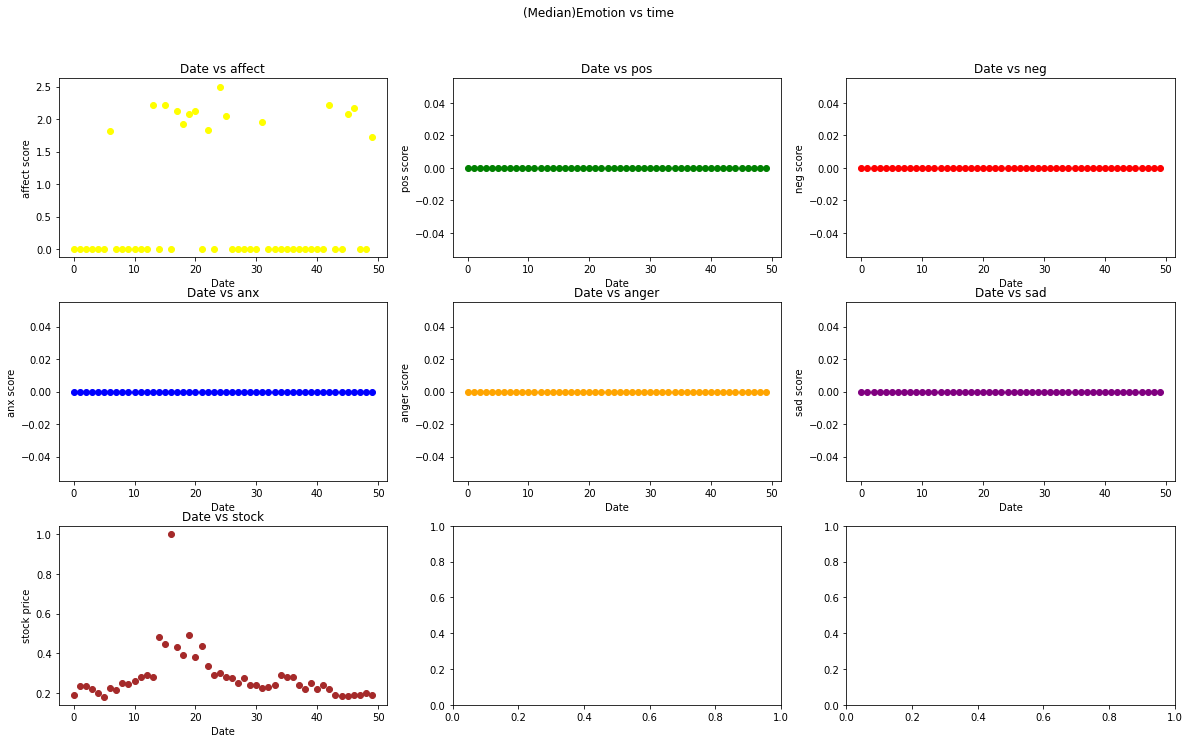

In [22]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Median)Emotion vs time')
fig.set_size_inches(20,10)

nokia_sort_affect_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(nokia_sort_affect_median.shape[0])],nokia_sort_affect_median[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

nokia_sort_pos_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(nokia_sort_pos_median.shape[0])],nokia_sort_pos_median[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

nokia_sort_neg_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(nokia_sort_neg_median.shape[0])],nokia_sort_neg_median[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

nokia_sort_anx_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(nokia_sort_anx_median.shape[0])],nokia_sort_anx_median[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

nokia_sort_anger_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(nokia_sort_anger_median.shape[0])],nokia_sort_anger_median[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

nokia_sort_sad_median = nokia_merge_df_median.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(nokia_sort_sad_median.shape[0])],nokia_sort_sad_median[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

nokia_sort_date = nokia_merge_df_median.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(nokia_sort_date.shape[0])],nokia_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting Nokia stock with std sentimental analysis

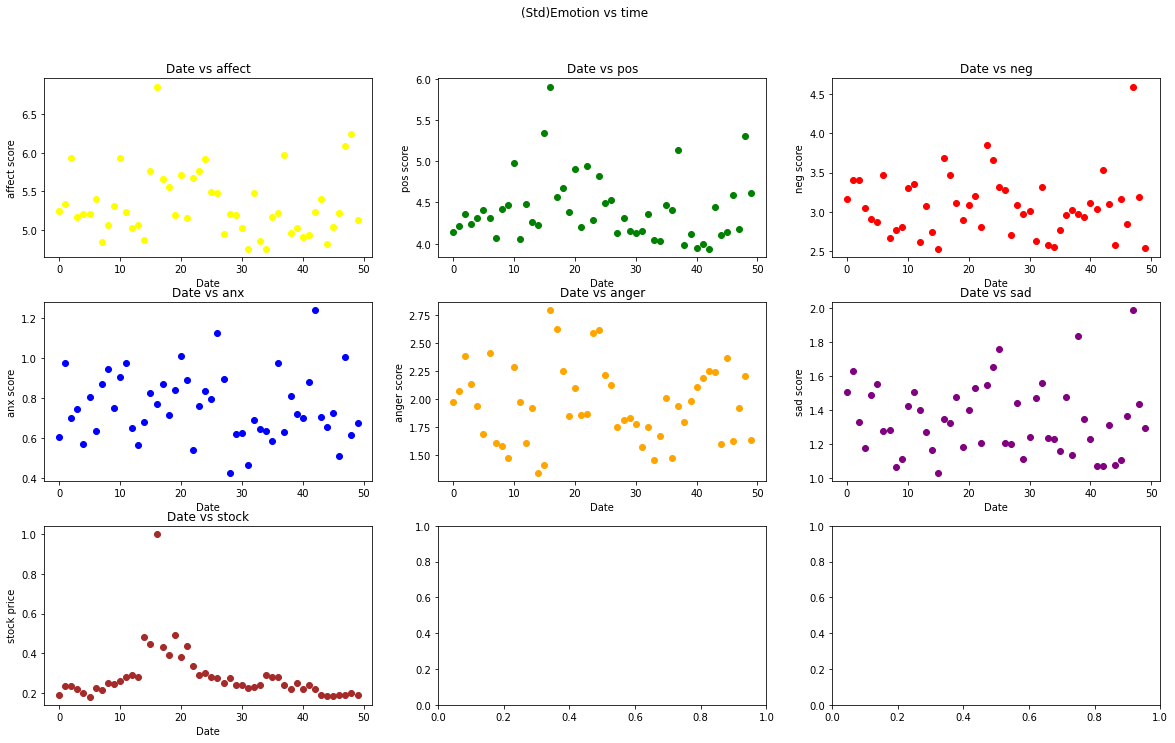

In [23]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Std)Emotion vs time')
fig.set_size_inches(20,10)

nokia_sort_affect_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(nokia_sort_affect_std.shape[0])],nokia_sort_affect_std[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

nokia_sort_pos_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(nokia_sort_pos_std.shape[0])],nokia_sort_pos_std[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

nokia_sort_neg_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(nokia_sort_neg_std.shape[0])],nokia_sort_neg_std[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

nokia_sort_anx_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(nokia_sort_anx_std.shape[0])],nokia_sort_anx_std[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

nokia_sort_anger_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(nokia_sort_anger_std.shape[0])],nokia_sort_anger_std[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

nokia_sort_sad_std = nokia_merge_df_std.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(nokia_sort_sad_std.shape[0])],nokia_sort_sad_std[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

nokia_sort_date = nokia_merge_df_std.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(nokia_sort_date.shape[0])],nokia_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting Nokia stock with maximum sentimental analysis

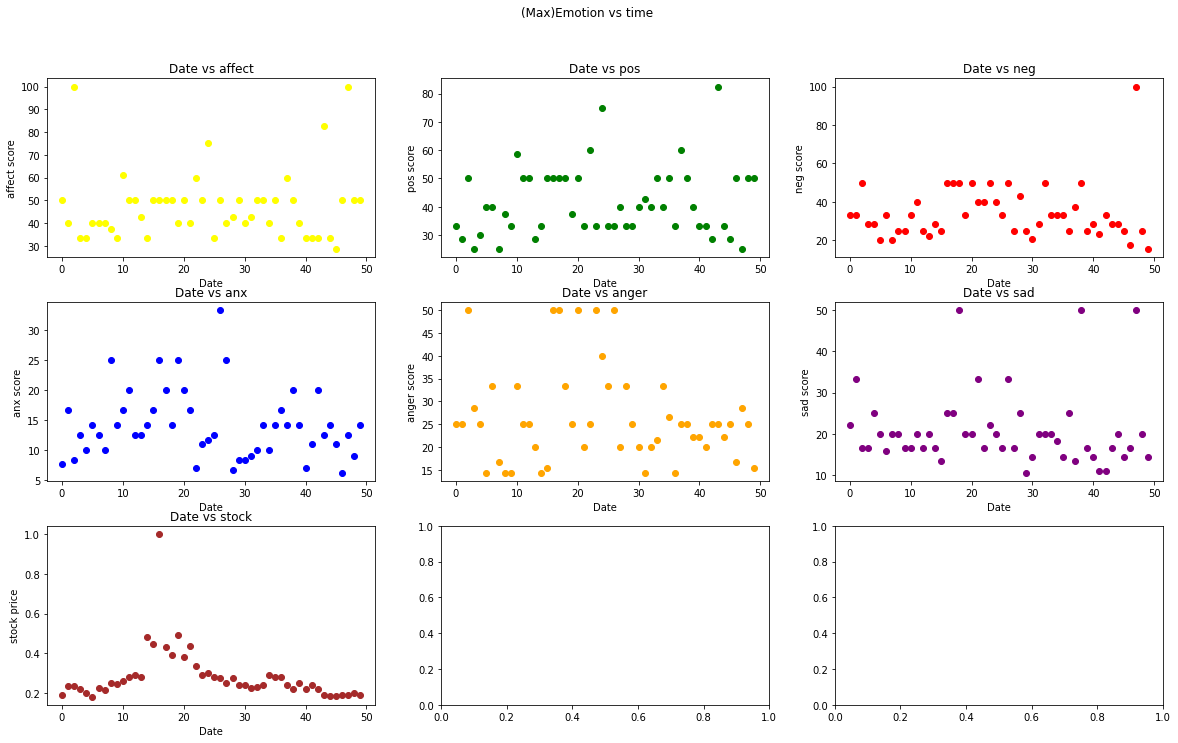

In [24]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Max)Emotion vs time')
fig.set_size_inches(20,10)

nokia_sort_affect_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(nokia_sort_affect_max.shape[0])],nokia_sort_affect_max[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

nokia_sort_pos_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(nokia_sort_pos_max.shape[0])],nokia_sort_pos_max[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

nokia_sort_neg_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(nokia_sort_neg_max.shape[0])],nokia_sort_neg_max[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

nokia_sort_anx_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(nokia_sort_anx_max.shape[0])],nokia_sort_anx_max[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

nokia_sort_anger_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(nokia_sort_anger_max.shape[0])],nokia_sort_anger_max[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

nokia_sort_sad_max = nokia_merge_df_max.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(nokia_sort_sad_max.shape[0])],nokia_sort_sad_max[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

nokia_sort_date = nokia_merge_df_max.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(nokia_sort_date.shape[0])],nokia_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

Plotting Nokia stock with minimum sentimental analysis

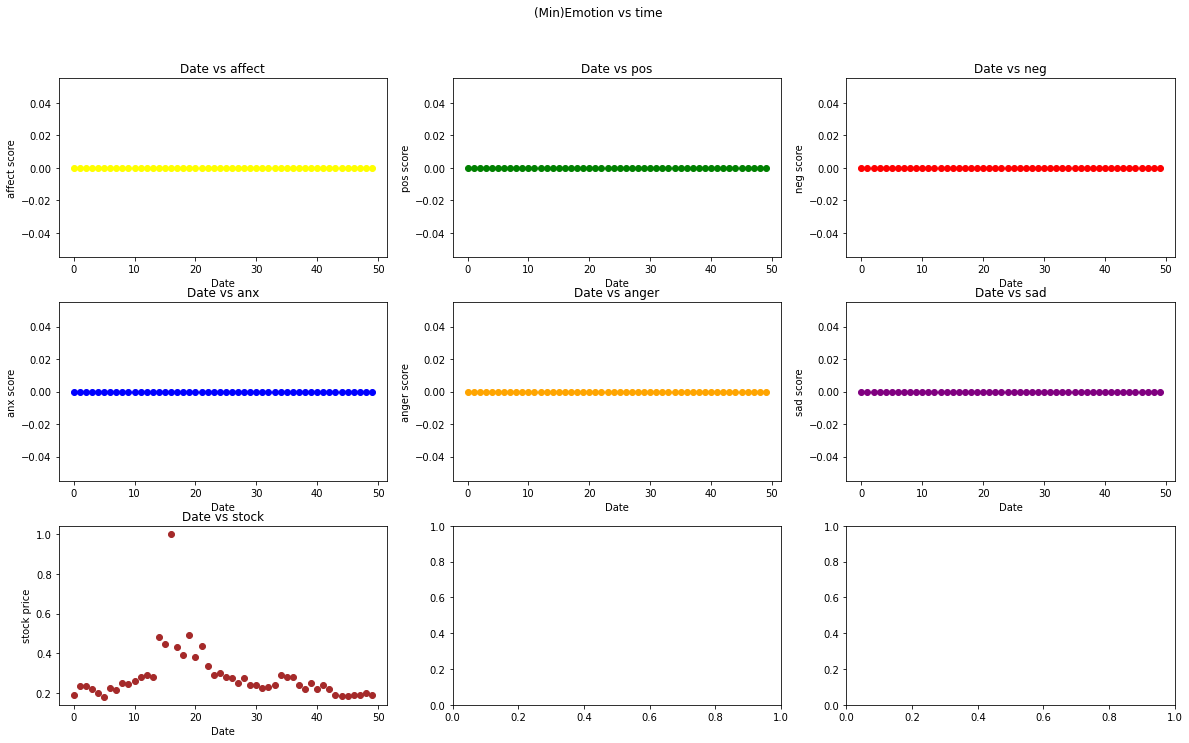

In [25]:
fig, axs = plt.subplots(3,3)
plt.subplots_adjust(bottom=0.01,hspace=0.25)
fig.suptitle('(Min)Emotion vs time')
fig.set_size_inches(20,10)

nokia_sort_affect_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[0,0].scatter([i for i in range(nokia_sort_affect_min.shape[0])],nokia_sort_affect_min[['affect']],color='yellow',label='affect')
axs[0,0].set_title('Date vs affect')
axs[0,0].set(xlabel='Date', ylabel='affect score')

nokia_sort_pos_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[0,1].scatter([i for i in range(nokia_sort_pos_min.shape[0])],nokia_sort_pos_min[['pos']],color='green',label='pos')
axs[0,1].set_title('Date vs pos')
axs[0,1].set(xlabel='Date', ylabel='pos score')

nokia_sort_neg_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[0,2].scatter([i for i in range(nokia_sort_neg_min.shape[0])],nokia_sort_neg_min[['neg']],color='red',label='neg')
axs[0,2].set_title('Date vs neg')
axs[0,2].set(xlabel='Date', ylabel='neg score')

nokia_sort_anx_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[1,0].scatter([i for i in range(nokia_sort_anx_min.shape[0])],nokia_sort_anx_min[['anx']],color='blue',label='anx')
axs[1,0].set_title('Date vs anx')
axs[1,0].set(xlabel='Date', ylabel='anx score')

nokia_sort_anger_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[1,1].scatter([i for i in range(nokia_sort_anger_min.shape[0])],nokia_sort_anger_min[['anger']],color='orange',label='anger')
axs[1,1].set_title('Date vs anger')
axs[1,1].set(xlabel='Date', ylabel='anger score')

nokia_sort_sad_min = nokia_merge_df_min.sort_values(by=['Date'])
axs[1,2].scatter([i for i in range(nokia_sort_sad_min.shape[0])],nokia_sort_sad_min[['sad']],color='purple',label='sad')
axs[1,2].set_title('Date vs sad')
axs[1,2].set(xlabel='Date', ylabel='sad score')

nokia_sort_date = nokia_merge_df_min.sort_values(by=['Date'])
axs[2,0].scatter([i for i in range(nokia_sort_date.shape[0])],nokia_sort_date[['close']],color='brown',label='stock')
axs[2,0].set_title('Date vs stock')
axs[2,0].set(xlabel='Date', ylabel='stock price')

plt.show()

# Training with different method

Training with mean sentimental analysis

In [26]:
#Training models based on the nokia data for four features(affect,neg,pos,anx,anger,sad) separately
reg_nokia_affect_mean = LinearRegression().fit(nokia_merge_df_mean[['affect']][:-10], nokia_merge_df_mean[['close']][:-10])
reg_nokia_pos_mean = LinearRegression().fit(nokia_merge_df_mean[['pos']][:-10], nokia_merge_df_mean[['close']][:-10])
reg_nokia_neg_mean = LinearRegression().fit(nokia_merge_df_mean[['neg']][:-10], nokia_merge_df_mean[['close']][:-10])
reg_nokia_anx_mean = LinearRegression().fit(nokia_merge_df_mean[['anx']][:-10], nokia_merge_df_mean[['close']][:-10])
reg_nokia_anger_mean = LinearRegression().fit(nokia_merge_df_mean[['anger']][:-10], nokia_merge_df_mean[['close']][:-10])
reg_nokia_sad_mean = LinearRegression().fit(nokia_merge_df_mean[['sad']][:-10], nokia_merge_df_mean[['close']][:-10])

In [27]:
#predict the stock price of nokia using new models
pred_nokia_affect_mean = reg_nokia_affect_mean.predict(nokia_merge_df_mean[['affect']][-10:])
pred_nokia_pos_mean = reg_nokia_pos_mean.predict(nokia_merge_df_mean[['pos']][-10:])
pred_nokia_neg_mean = reg_nokia_neg_mean.predict(nokia_merge_df_mean[['neg']][-10:])
pred_nokia_anx_mean = reg_nokia_anx_mean.predict(nokia_merge_df_mean[['anx']][-10:])
pred_nokia_anger_mean = reg_nokia_anger_mean.predict(nokia_merge_df_mean[['anger']][-10:])
pred_nokia_sad_mean = reg_nokia_sad_mean.predict(nokia_merge_df_mean[['sad']][-10:])

#predict on the training model to plot the data
train_nokia_affect_mean = reg_nokia_affect_mean.predict(nokia_merge_df_mean[['affect']][:-10])
train_nokia_pos_mean = reg_nokia_pos_mean.predict(nokia_merge_df_mean[['pos']][:-10])
train_nokia_neg_mean = reg_nokia_neg_mean.predict(nokia_merge_df_mean[['neg']][:-10])
train_nokia_anx_mean = reg_nokia_anx_mean.predict(nokia_merge_df_mean[['anx']][:-10])
train_nokia_anger_mean = reg_nokia_anger_mean.predict(nokia_merge_df_mean[['anger']][:-10])
train_nokia_sad_mean = reg_nokia_sad_mean.predict(nokia_merge_df_mean[['sad']][:-10])

#combine five kinds of prediction for nokia with original data
nokia_merge_pred1_mean = pd.concat([nokia_merge_df_mean[:-10], pd.DataFrame(train_nokia_affect_mean,columns=['pred_affect'])], axis=1)
nokia_merge_pred1_mean = pd.concat([nokia_merge_pred1_mean, pd.DataFrame(train_nokia_pos_mean,columns=['pred_pos'])], axis=1)
nokia_merge_pred1_mean = pd.concat([nokia_merge_pred1_mean, pd.DataFrame(train_nokia_neg_mean,columns=['pred_neg'])], axis=1)
nokia_merge_pred1_mean = pd.concat([nokia_merge_pred1_mean, pd.DataFrame(train_nokia_anx_mean,columns=['pred_anx'])], axis=1)
nokia_merge_pred1_mean = pd.concat([nokia_merge_pred1_mean, pd.DataFrame(train_nokia_anger_mean,columns=['pred_anger'])], axis=1)
nokia_merge_pred1_mean = pd.concat([nokia_merge_pred1_mean, pd.DataFrame(train_nokia_sad_mean,columns=['pred_sad'])], axis=1)

#nokia_merge_pred1_mean

In [28]:
nokia_score_affect_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_affect_mean)
nokia_score_pos_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_pos_mean)
nokia_score_neg_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_neg_mean)
nokia_score_anx_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_anx_mean)
nokia_score_anger_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_anger_mean)
nokia_score_sad_mean = mean_squared_error(nokia_merge_df_mean[['close']][-10:], pred_nokia_sad_mean)
[nokia_score_affect_mean,nokia_score_pos_mean,nokia_score_neg_mean,nokia_score_anx_mean,nokia_score_anger_mean,nokia_score_sad_mean]

[0.01321383678034512,
 0.011330155233853337,
 0.012695518427278646,
 0.013022560113392048,
 0.012747643762853778,
 0.012072663435581135]

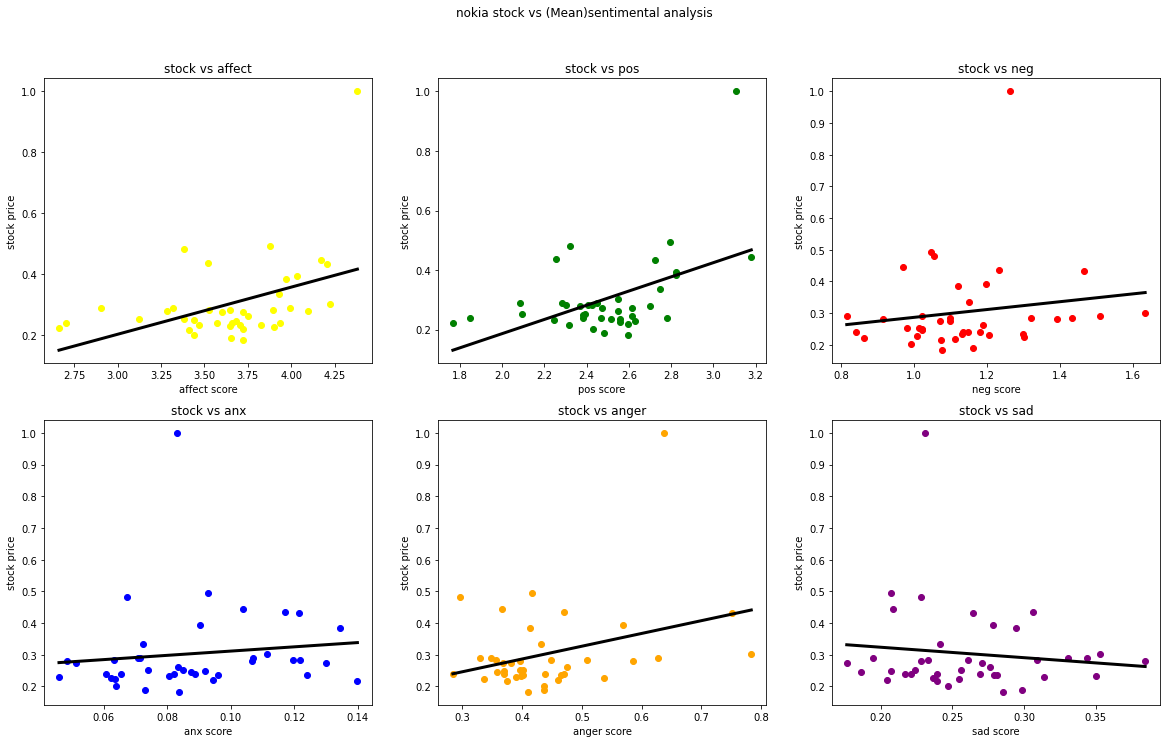

In [29]:
#plot the new nokia model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('nokia stock vs (Mean)sentimental analysis')
fig.set_size_inches(20,10)

nokia_sort_affect_mean = nokia_merge_pred1_mean.sort_values(by=['affect'])
axs[0,0].scatter(nokia_sort_affect_mean[['affect']],nokia_sort_affect_mean[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(nokia_sort_affect_mean[['affect']], nokia_sort_affect_mean[['pred_affect']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

nokia_sort_pos_mean = nokia_merge_pred1_mean.sort_values(by=['pos'])
axs[0,1].scatter(nokia_sort_pos_mean[['pos']],nokia_sort_pos_mean[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(nokia_sort_pos_mean[['pos']], nokia_sort_pos_mean[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

nokia_sort_neg_mean = nokia_merge_pred1_mean.sort_values(by=['neg'])
axs[0,2].scatter(nokia_sort_neg_mean[['neg']],nokia_sort_neg_mean[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(nokia_sort_neg_mean[['neg']], nokia_sort_neg_mean[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

nokia_sort_anx_mean = nokia_merge_pred1_mean.sort_values(by=['anx'])
axs[1,0].scatter(nokia_sort_anx_mean[['anx']],nokia_sort_anx_mean[['close']],color='blue',label='anx')#Plotting the data
axs[1,0].plot(nokia_sort_anx_mean[['anx']], nokia_sort_anx_mean[['pred_anx']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

nokia_sort_anger_mean = nokia_merge_pred1_mean.sort_values(by=['anger'])
axs[1,1].scatter(nokia_sort_anger_mean[['anger']],nokia_sort_anger_mean[['close']],color='orange',label='anger')#Plotting the data
axs[1,1].plot(nokia_sort_anger_mean[['anger']], nokia_sort_anger_mean[['pred_anger']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

nokia_sort_sad_mean = nokia_merge_pred1_mean.sort_values(by=['sad'])
axs[1,2].scatter(nokia_sort_sad_mean[['sad']],nokia_sort_sad_mean[['close']],color='purple',label='sad')#Plotting the data
axs[1,2].plot(nokia_sort_sad_mean[['sad']], nokia_sort_sad_mean[['pred_sad']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,2].set_title('stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

Training with median sentimental analysis

In [30]:
#Training models based on the nokia data for four features(affect,neg,pos,anx,anger,sad) separately
reg_nokia_affect_median = LinearRegression().fit(nokia_merge_df_median[['affect']][:-10], nokia_merge_df_median[['close']][:-10])
reg_nokia_pos_median = LinearRegression().fit(nokia_merge_df_median[['pos']][:-10], nokia_merge_df_median[['close']][:-10])
reg_nokia_neg_median = LinearRegression().fit(nokia_merge_df_median[['neg']][:-10], nokia_merge_df_median[['close']][:-10])
reg_nokia_anx_median = LinearRegression().fit(nokia_merge_df_median[['anx']][:-10], nokia_merge_df_median[['close']][:-10])
reg_nokia_anger_median = LinearRegression().fit(nokia_merge_df_median[['anger']][:-10], nokia_merge_df_median[['close']][:-10])
reg_nokia_sad_median = LinearRegression().fit(nokia_merge_df_median[['sad']][:-10], nokia_merge_df_median[['close']][:-10])

In [31]:
#predict the stock price of nokia using new models
pred_nokia_affect_median = reg_nokia_affect_median.predict(nokia_merge_df_median[['affect']][-10:])
pred_nokia_pos_median = reg_nokia_pos_median.predict(nokia_merge_df_median[['pos']][-10:])
pred_nokia_neg_median = reg_nokia_neg_median.predict(nokia_merge_df_median[['neg']][-10:])
pred_nokia_anx_median = reg_nokia_anx_median.predict(nokia_merge_df_median[['anx']][-10:])
pred_nokia_anger_median = reg_nokia_anger_median.predict(nokia_merge_df_median[['anger']][-10:])
pred_nokia_sad_median = reg_nokia_sad_median.predict(nokia_merge_df_median[['sad']][-10:])

#predict on the training model to plot the data
train_nokia_affect_median = reg_nokia_affect_median.predict(nokia_merge_df_median[['affect']][:-10])
train_nokia_pos_median = reg_nokia_pos_median.predict(nokia_merge_df_median[['pos']][:-10])
train_nokia_neg_median = reg_nokia_neg_median.predict(nokia_merge_df_median[['neg']][:-10])
train_nokia_anx_median = reg_nokia_anx_median.predict(nokia_merge_df_median[['anx']][:-10])
train_nokia_anger_median = reg_nokia_anger_median.predict(nokia_merge_df_median[['anger']][:-10])
train_nokia_sad_median = reg_nokia_sad_median.predict(nokia_merge_df_median[['sad']][:-10])

#combine five kinds of prediction for nokia with original data
nokia_merge_pred1_median = pd.concat([nokia_merge_df_median[:-10], pd.DataFrame(train_nokia_affect_median,columns=['pred_affect'])], axis=1)
nokia_merge_pred1_median = pd.concat([nokia_merge_pred1_median, pd.DataFrame(train_nokia_pos_median,columns=['pred_pos'])], axis=1)
nokia_merge_pred1_median = pd.concat([nokia_merge_pred1_median, pd.DataFrame(train_nokia_neg_median,columns=['pred_neg'])], axis=1)
nokia_merge_pred1_median = pd.concat([nokia_merge_pred1_median, pd.DataFrame(train_nokia_anx_median,columns=['pred_anx'])], axis=1)
nokia_merge_pred1_median = pd.concat([nokia_merge_pred1_median, pd.DataFrame(train_nokia_anger_median,columns=['pred_anger'])], axis=1)
nokia_merge_pred1_median = pd.concat([nokia_merge_pred1_median, pd.DataFrame(train_nokia_sad_median,columns=['pred_sad'])], axis=1)

# nokia_merge_pred1_median

In [32]:
nokia_score_affect_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_affect_median)
nokia_score_pos_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_pos_median)
nokia_score_neg_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_neg_median)
nokia_score_anx_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_anx_median)
nokia_score_anger_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_anger_median)
nokia_score_sad_median = mean_squared_error(nokia_merge_df_median[['close']][-10:], pred_nokia_sad_median)
[nokia_score_affect_median,nokia_score_pos_median,nokia_score_neg_median,nokia_score_anx_median,nokia_score_anger_median,nokia_score_sad_median]

[0.0132656056799841,
 0.01071340185343545,
 0.01071340185343545,
 0.01071340185343545,
 0.01071340185343545,
 0.01071340185343545]

In [33]:
#plot the new amc model

Training with std sentimental analysis

In [34]:
#Training models based on the nokia data for four features(affect,neg,pos,anx,anger,sad) separately
reg_nokia_affect_std = LinearRegression().fit(nokia_merge_df_std[['affect']][:-10], nokia_merge_df_std[['close']][:-10])
reg_nokia_pos_std = LinearRegression().fit(nokia_merge_df_std[['pos']][:-10], nokia_merge_df_std[['close']][:-10])
reg_nokia_neg_std = LinearRegression().fit(nokia_merge_df_std[['neg']][:-10], nokia_merge_df_std[['close']][:-10])
reg_nokia_anx_std = LinearRegression().fit(nokia_merge_df_std[['anx']][:-10], nokia_merge_df_std[['close']][:-10])
reg_nokia_anger_std = LinearRegression().fit(nokia_merge_df_std[['anger']][:-10], nokia_merge_df_std[['close']][:-10])
reg_nokia_sad_std = LinearRegression().fit(nokia_merge_df_std[['sad']][:-10], nokia_merge_df_std[['close']][:-10])

In [35]:
#predict the stock price of nokia using new models
pred_nokia_affect_std = reg_nokia_affect_std.predict(nokia_merge_df_std[['affect']][-10:])
pred_nokia_pos_std = reg_nokia_pos_std.predict(nokia_merge_df_std[['pos']][-10:])
pred_nokia_neg_std = reg_nokia_neg_std.predict(nokia_merge_df_std[['neg']][-10:])
pred_nokia_anx_std = reg_nokia_anx_std.predict(nokia_merge_df_std[['anx']][-10:])
pred_nokia_anger_std = reg_nokia_anger_std.predict(nokia_merge_df_std[['anger']][-10:])
pred_nokia_sad_std = reg_nokia_sad_std.predict(nokia_merge_df_std[['sad']][-10:])

#predict on the training model to plot the data
train_nokia_affect_std = reg_nokia_affect_std.predict(nokia_merge_df_std[['affect']][:-10])
train_nokia_pos_std = reg_nokia_pos_std.predict(nokia_merge_df_std[['pos']][:-10])
train_nokia_neg_std = reg_nokia_neg_std.predict(nokia_merge_df_std[['neg']][:-10])
train_nokia_anx_std = reg_nokia_anx_std.predict(nokia_merge_df_std[['anx']][:-10])
train_nokia_anger_std = reg_nokia_anger_std.predict(nokia_merge_df_std[['anger']][:-10])
train_nokia_sad_std = reg_nokia_sad_std.predict(nokia_merge_df_std[['sad']][:-10])

#combine five kinds of prediction for nokia with original data
nokia_merge_pred1_std = pd.concat([nokia_merge_df_std[:-10], pd.DataFrame(train_nokia_affect_std,columns=['pred_affect'])], axis=1)
nokia_merge_pred1_std = pd.concat([nokia_merge_pred1_std, pd.DataFrame(train_nokia_pos_std,columns=['pred_pos'])], axis=1)
nokia_merge_pred1_std = pd.concat([nokia_merge_pred1_std, pd.DataFrame(train_nokia_neg_std,columns=['pred_neg'])], axis=1)
nokia_merge_pred1_std = pd.concat([nokia_merge_pred1_std, pd.DataFrame(train_nokia_anx_std,columns=['pred_anx'])], axis=1)
nokia_merge_pred1_std = pd.concat([nokia_merge_pred1_std, pd.DataFrame(train_nokia_anger_std,columns=['pred_anger'])], axis=1)
nokia_merge_pred1_std = pd.concat([nokia_merge_pred1_std, pd.DataFrame(train_nokia_sad_std,columns=['pred_sad'])], axis=1)

#nokia_merge_pred1_std

In [36]:
nokia_score_affect_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_affect_std)
nokia_score_pos_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_pos_std)
nokia_score_neg_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_neg_std)
nokia_score_anx_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_anx_std)
nokia_score_anger_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_anger_std)
nokia_score_sad_std = mean_squared_error(nokia_merge_df_std[['close']][-10:], pred_nokia_sad_std)
[nokia_score_affect_std,nokia_score_pos_std,nokia_score_neg_std,nokia_score_anx_std,nokia_score_anger_std,nokia_score_sad_std]

[0.01708548237864805,
 0.016178347107148557,
 0.016000527528956355,
 0.01137862980580533,
 0.013310833651777468,
 0.012075777213225178]

In [37]:
#plot the new amc model

Training with maximum sentimental analysis

In [38]:
#Training models based on the nokia data for four features(affect,neg,pos,anx,anger,sad) separately
reg_nokia_affect_max = LinearRegression().fit(nokia_merge_df_max[['affect']][:-10], nokia_merge_df_max[['close']][:-10])
reg_nokia_pos_max = LinearRegression().fit(nokia_merge_df_max[['pos']][:-10], nokia_merge_df_max[['close']][:-10])
reg_nokia_neg_max = LinearRegression().fit(nokia_merge_df_max[['neg']][:-10], nokia_merge_df_max[['close']][:-10])
reg_nokia_anx_max = LinearRegression().fit(nokia_merge_df_max[['anx']][:-10], nokia_merge_df_max[['close']][:-10])
reg_nokia_anger_max = LinearRegression().fit(nokia_merge_df_max[['anger']][:-10], nokia_merge_df_max[['close']][:-10])
reg_nokia_sad_max = LinearRegression().fit(nokia_merge_df_max[['sad']][:-10], nokia_merge_df_max[['close']][:-10])

In [39]:
#predict the stock price of nokia using new models
pred_nokia_affect_max = reg_nokia_affect_max.predict(nokia_merge_df_max[['affect']][-10:])
pred_nokia_pos_max = reg_nokia_pos_max.predict(nokia_merge_df_max[['pos']][-10:])
pred_nokia_neg_max = reg_nokia_neg_max.predict(nokia_merge_df_max[['neg']][-10:])
pred_nokia_anx_max = reg_nokia_anx_max.predict(nokia_merge_df_max[['anx']][-10:])
pred_nokia_anger_max = reg_nokia_anger_max.predict(nokia_merge_df_max[['anger']][-10:])
pred_nokia_sad_max = reg_nokia_sad_max.predict(nokia_merge_df_max[['sad']][-10:])

#predict on the training model to plot the data
train_nokia_affect_max = reg_nokia_affect_max.predict(nokia_merge_df_max[['affect']][:-10])
train_nokia_pos_max = reg_nokia_pos_max.predict(nokia_merge_df_max[['pos']][:-10])
train_nokia_neg_max = reg_nokia_neg_max.predict(nokia_merge_df_max[['neg']][:-10])
train_nokia_anx_max = reg_nokia_anx_max.predict(nokia_merge_df_max[['anx']][:-10])
train_nokia_anger_max = reg_nokia_anger_max.predict(nokia_merge_df_max[['anger']][:-10])
train_nokia_sad_max = reg_nokia_sad_max.predict(nokia_merge_df_max[['sad']][:-10])

#combine five kinds of prediction for nokia with original data
nokia_merge_pred1_max = pd.concat([nokia_merge_df_max[:-10], pd.DataFrame(train_nokia_affect_max,columns=['pred_affect'])], axis=1)
nokia_merge_pred1_max = pd.concat([nokia_merge_pred1_max, pd.DataFrame(train_nokia_pos_max,columns=['pred_pos'])], axis=1)
nokia_merge_pred1_max = pd.concat([nokia_merge_pred1_max, pd.DataFrame(train_nokia_neg_max,columns=['pred_neg'])], axis=1)
nokia_merge_pred1_max = pd.concat([nokia_merge_pred1_max, pd.DataFrame(train_nokia_anx_max,columns=['pred_anx'])], axis=1)
nokia_merge_pred1_max = pd.concat([nokia_merge_pred1_max, pd.DataFrame(train_nokia_anger_max,columns=['pred_anger'])], axis=1)
nokia_merge_pred1_max = pd.concat([nokia_merge_pred1_max, pd.DataFrame(train_nokia_sad_max,columns=['pred_sad'])], axis=1)

#nokia_merge_pred1_max

In [40]:
nokia_score_affect_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_affect_max)
nokia_score_pos_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_pos_max)
nokia_score_neg_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_neg_max)
nokia_score_anx_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_anx_max)
nokia_score_anger_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_anger_max)
nokia_score_sad_max = mean_squared_error(nokia_merge_df_max[['close']][-10:], pred_nokia_sad_max)
[nokia_score_affect_max,nokia_score_pos_max,nokia_score_neg_max,nokia_score_anx_max,nokia_score_anger_max,nokia_score_sad_max]

[0.01090519405511919,
 0.012660885333445579,
 0.020174720982594832,
 0.006953335516738372,
 0.0071979096401544275,
 0.010430746577341419]

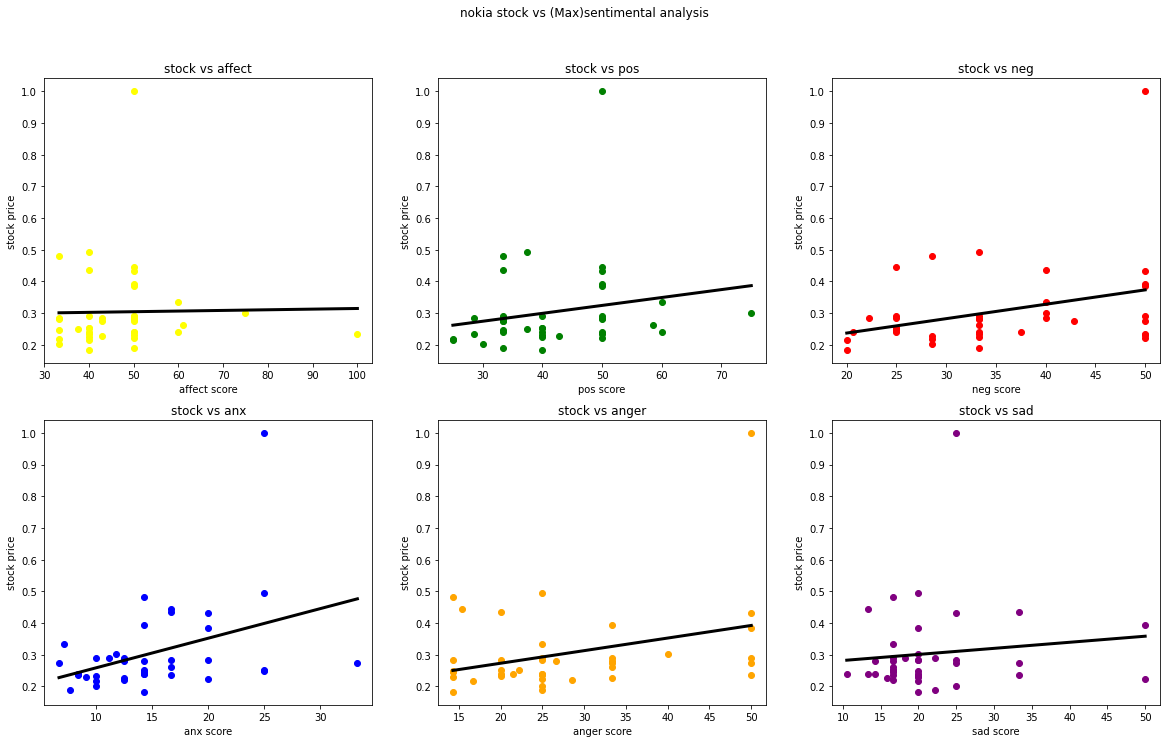

In [41]:
#plot the new nokia model
#In this part, it is plotting the data with the stock + the model itself
fig, axs = plt.subplots(2,3)
plt.subplots_adjust(bottom=0.01)
fig.suptitle('nokia stock vs (Max)sentimental analysis')
fig.set_size_inches(20,10)

nokia_sort_affect_max = nokia_merge_pred1_max.sort_values(by=['affect'])
axs[0,0].scatter(nokia_sort_affect_max[['affect']],nokia_sort_affect_max[['close']],color='yellow',label='affect')#Plotting the data
axs[0,0].plot(nokia_sort_affect_max[['affect']], nokia_sort_affect_max[['pred_affect']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,0].set_title('stock vs affect')
axs[0,0].set(xlabel='affect score', ylabel='stock price')

nokia_sort_pos_max = nokia_merge_pred1_max.sort_values(by=['pos'])
axs[0,1].scatter(nokia_sort_pos_max[['pos']],nokia_sort_pos_max[['close']],color='green',label='pos')#Plotting the data
axs[0,1].plot(nokia_sort_pos_max[['pos']], nokia_sort_pos_max[['pred_pos']], color='black', linewidth=3)#plotting the model by using the prediction
axs[0,1].set_title('stock vs pos')
axs[0,1].set(xlabel='pos score', ylabel='stock price')

nokia_sort_neg_max = nokia_merge_pred1_max.sort_values(by=['neg'])
axs[0,2].scatter(nokia_sort_neg_max[['neg']],nokia_sort_neg_max[['close']],color='red',label='neg') #Plotting the data
axs[0,2].plot(nokia_sort_neg_max[['neg']], nokia_sort_neg_max[['pred_neg']], color='black', linewidth=3) #plotting the model by using the prediction
axs[0,2].set_title('stock vs neg')
axs[0,2].set(xlabel='neg score', ylabel='stock price')

nokia_sort_anx_max = nokia_merge_pred1_max.sort_values(by=['anx'])
axs[1,0].scatter(nokia_sort_anx_max[['anx']],nokia_sort_anx_max[['close']],color='blue',label='anx')#Plotting the data
axs[1,0].plot(nokia_sort_anx_max[['anx']], nokia_sort_anx_max[['pred_anx']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,0].set_title('stock vs anx')
axs[1,0].set(xlabel='anx score', ylabel='stock price')

nokia_sort_anger_max = nokia_merge_pred1_max.sort_values(by=['anger'])
axs[1,1].scatter(nokia_sort_anger_max[['anger']],nokia_sort_anger_max[['close']],color='orange',label='anger')#Plotting the data
axs[1,1].plot(nokia_sort_anger_max[['anger']], nokia_sort_anger_max[['pred_anger']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,1].set_title('stock vs anger')
axs[1,1].set(xlabel='anger score', ylabel='stock price')

nokia_sort_sad_max = nokia_merge_pred1_max.sort_values(by=['sad'])
axs[1,2].scatter(nokia_sort_sad_max[['sad']],nokia_sort_sad_max[['close']],color='purple',label='sad')#Plotting the data
axs[1,2].plot(nokia_sort_sad_max[['sad']], nokia_sort_sad_max[['pred_sad']], color='black', linewidth=3)#plotting the model by using the prediction
axs[1,2].set_title('stock vs sad')
axs[1,2].set(xlabel='sad score', ylabel='stock price')

plt.show()

Training with minimum sentimental analysis

In [42]:
#Training models based on the nokia data for four features(affect,neg,pos,anx,anger,sad) separately
reg_nokia_affect_min = LinearRegression().fit(nokia_merge_df_min[['affect']][:-10], nokia_merge_df_min[['close']][:-10])
reg_nokia_pos_min = LinearRegression().fit(nokia_merge_df_min[['pos']][:-10], nokia_merge_df_min[['close']][:-10])
reg_nokia_neg_min = LinearRegression().fit(nokia_merge_df_min[['neg']][:-10], nokia_merge_df_min[['close']][:-10])
reg_nokia_anx_min = LinearRegression().fit(nokia_merge_df_min[['anx']][:-10], nokia_merge_df_min[['close']][:-10])
reg_nokia_anger_min = LinearRegression().fit(nokia_merge_df_min[['anger']][:-10], nokia_merge_df_min[['close']][:-10])
reg_nokia_sad_min = LinearRegression().fit(nokia_merge_df_min[['sad']][:-10], nokia_merge_df_min[['close']][:-10])

In [43]:
#predict the stock price of nokia using new models
pred_nokia_affect_min = reg_nokia_affect_min.predict(nokia_merge_df_min[['affect']][-10:])
pred_nokia_pos_min = reg_nokia_pos_min.predict(nokia_merge_df_min[['pos']][-10:])
pred_nokia_neg_min = reg_nokia_neg_min.predict(nokia_merge_df_min[['neg']][-10:])
pred_nokia_anx_min = reg_nokia_anx_min.predict(nokia_merge_df_min[['anx']][-10:])
pred_nokia_anger_min = reg_nokia_anger_min.predict(nokia_merge_df_min[['anger']][-10:])
pred_nokia_sad_min = reg_nokia_sad_min.predict(nokia_merge_df_min[['sad']][-10:])

#predict on the training model to plot the data
train_nokia_affect_min = reg_nokia_affect_min.predict(nokia_merge_df_min[['affect']][:-10])
train_nokia_pos_min = reg_nokia_pos_min.predict(nokia_merge_df_min[['pos']][:-10])
train_nokia_neg_min = reg_nokia_neg_min.predict(nokia_merge_df_min[['neg']][:-10])
train_nokia_anx_min = reg_nokia_anx_min.predict(nokia_merge_df_min[['anx']][:-10])
train_nokia_anger_min = reg_nokia_anger_min.predict(nokia_merge_df_min[['anger']][:-10])
train_nokia_sad_min = reg_nokia_sad_min.predict(nokia_merge_df_min[['sad']][:-10])

#combine five kinds of prediction for nokia with original data
nokia_merge_pred1_min = pd.concat([nokia_merge_df_min[:-10], pd.DataFrame(train_nokia_affect_min,columns=['pred_affect'])], axis=1)
nokia_merge_pred1_min = pd.concat([nokia_merge_pred1_min, pd.DataFrame(train_nokia_pos_min,columns=['pred_pos'])], axis=1)
nokia_merge_pred1_min = pd.concat([nokia_merge_pred1_min, pd.DataFrame(train_nokia_neg_min,columns=['pred_neg'])], axis=1)
nokia_merge_pred1_min = pd.concat([nokia_merge_pred1_min, pd.DataFrame(train_nokia_anx_min,columns=['pred_anx'])], axis=1)
nokia_merge_pred1_min = pd.concat([nokia_merge_pred1_min, pd.DataFrame(train_nokia_anger_min,columns=['pred_anger'])], axis=1)
nokia_merge_pred1_min = pd.concat([nokia_merge_pred1_min, pd.DataFrame(train_nokia_sad_min,columns=['pred_sad'])], axis=1)

#nokia_merge_pred1_min

In [44]:
nokia_score_affect_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_affect_min)
nokia_score_pos_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_pos_min)
nokia_score_neg_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_neg_min)
nokia_score_anx_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_anx_min)
nokia_score_anger_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_anger_min)
nokia_score_sad_min = mean_squared_error(nokia_merge_df_min[['close']][-10:], pred_nokia_sad_min)
[nokia_score_affect_min,nokia_score_pos_min,nokia_score_neg_min,nokia_score_anx_min,nokia_score_anger_min,nokia_score_sad_min]

[0.01071340185343545,
 0.01071340185343545,
 0.01071340185343545,
 0.01071340185343545,
 0.01071340185343545,
 0.01071340185343545]

In [45]:
#plot the new amc model